# .                                                                 Name : Sahil Singh
# .                                                                 Roll : 2301301121
# .                                                                 Course : BTech CSE (AI & ML)
# .                                                                 Project No. : 2

# Website A/B testing for Conversion Optimisation
### Problem:
An e-commerce startup wants to know if a new checkout funnel (B) outperforms the old one (A).
### Steps:
1. Simulate click-through data (visits vs. purchases) for A and B.
2. Calculate conversion rates and 95% confidence intervals.
3. Plot conversion rates and error bars.
4. Perform a 2-proportion z-test

# Step 1: Import

1. **Library Imports**:
   - `numpy` is used for numerical operations and random sampling.
   - `pandas` is imported (though not yet used) for potential data handling.
   - `scipy.stats` and `proportions_ztest` from `statsmodels` are for statistical analysis.
   - `matplotlib.pyplot` is imported for plotting (also not yet used here).

2. **Reproducibility**:
   - `np.random.seed(1)` ensures that every run of the code produces the same random results, which is critical for debugging and testing.

3. **Test Parameters**:
   - Variant A: 10,000 users, 10% true conversion rate.
   - Variant B: 10,000 users, 12% true conversion rate.

4. **Simulation of Conversions**:
   - The number of successful conversions for each variant is generated using the **binomial distribution** (`np.random.binomial`), which is appropriate for modeling binary outcomes (success/failure).


In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

np.random.seed(1)      # Ensures same random number everytime

# Assume 10,000 visitors each
n_A, p_A = 10_000, 0.10   # Variant A: 10% true conversion
n_B, p_B = 10_000, 0.12   # Variant B: 12% true conversion

# Simulate number of purchases
success_A = np.random.binomial(n_A,p_A)
success_B = np.random.binomial(n_B,p_B)

- **`success_A`**: Number of users who converted in Variant A (expected ~1000).
- **`success_B`**: Number of users who converted in Variant B (expected ~1200)

  - These values are simulated based on their respective conversion probabilities (10% for A, 12% for B) and 10,000 users each.
  - The binomial distribution introduces realistic randomness while still allowing for control over the average expected result.

- These simulated success counts provide the foundation for conducting further statistical analysis, such as a **proportions Z-test**, to determine whether the difference in conversion rates between A and B is **statistically significant** or simply due to **random variation**.

This is crucial for mimicking real-world A/B test behavior before applying statistical inference.

In [7]:
print(success_A)
print(success_B)

991
1180


# Step 2: Calculate conversion rates and 95% confidence intervals.

- Define a function `proportion_ci()` to calculate the **conversion rate** and its **95% confidence interval** for a given number of successes and total visitors.
- Use the **normal approximation method**, where:
  - `p` is the observed conversion rate.
  - `z` is the z-score for the 95% confidence level.
  - `se` is the standard error of the proportion.
- Apply this function to both Variant A and Variant B using their simulated conversions.
- Organize the results in a `DataFrame` to display:
  - Variant names,
  - Number of visitors and conversions,
  - Estimated conversion rates,
  - Lower and upper bounds of the 95% confidence intervals.
- Print the table for comparison.

In [8]:
def proportion_ci(successes, n, alpha=0.05):
    p = successes/n                      # p = probability
    z = stats.norm.ppf(1-alpha/2)        # z = z-score, alpha = error
    se = np.sqrt(p * (1-p)/n)            # se = standard error
    return p,p-z*se,p+z*se

p_A, ci_low_A, ci_high_A = proportion_ci(success_A, n_A)
p_B, ci_low_B, ci_high_B = proportion_ci(success_B, n_B)

results = pd.DataFrame({
    'Variant': ['A','B'],
    'Visitors': [n_A,n_B],
    'Conversions': [success_A,success_B],
    'CR (p)': [p_A,p_B],        # CR = Conversion Rate
    'CI Lower (95%)': [ci_low_A, ci_low_B],
    'CI Upper (95%)': [ci_high_A, ci_high_B],
})
print(results)

  Variant  Visitors  Conversions  CR (p)  CI Lower (95%)  CI Upper (95%)
0       A     10000          991  0.0991        0.093244        0.104956
1       B     10000         1180  0.1180        0.111677        0.124323


- The **observed conversion rate** for Variant A is **0.0991**, based on **991 conversions** out of **10,000 visitors**.  
- For Variant B, the observed conversion rate is **0.1180**, based on **1,180 conversions** out of **10,000 visitors**.

Using the `proportion_ci()` function, the **95% confidence intervals** for the conversion rates were calculated as follows:

- Variant A: **[0.093244, 0.104956]**
- Variant B: **[0.111677, 0.124323]**

These results are summarized in a tabular format, which includes the number of visitors, number of conversions, calculated conversion rates, and the corresponding confidence intervals.

The non-overlapping confidence intervals indicate that Variant B likely performs better than Variant A in terms of conversion rate, with statistical confidence. This provides preliminary evidence that the observed difference is not due to random chance alone.

# Step 3: Plot conversion rates and error bars.

- Create a **bar chart** to visually compare the conversion rates of Variant A and Variant B.
- Use the previously computed conversion rates (`CR (p)`) and their **95% confidence intervals**.
- Add **error bars** to represent the margin of error (difference between conversion rate and confidence bounds).
- Assign distinct colors to each variant (`skyblue` for A and `salmon` for B).
- Label the y-axis as “Conversion Rate” and give the plot a title indicating the purpose of the visualization.
- Adjust the y-axis limit to ensure that all error bars are fully visible.

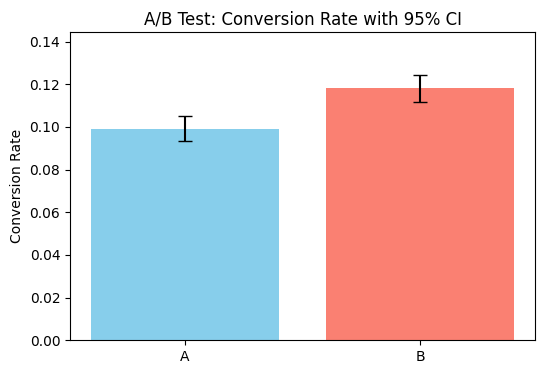

In [9]:
plt.figure(figsize=(6,4))
plt.bar(
    results['Variant'],
    results['CR (p)'],
    yerr=[
        results['CR (p)']-results['CI Lower (95%)'],
        results['CI Upper (95%)']-results['CR (p)']
    ],
    capsize=5,
    color=['skyblue','salmon']
)
plt.ylabel('Conversion Rate')
plt.title('A/B Test: Conversion Rate with 95% CI')
plt.ylim(0, max(results['CI Upper (95%)'])+0.02)
plt.show()

- **Variant A** has a conversion rate of **approximately 0.099**, while **Variant B** has a higher conversion rate of **approximately 0.118**.
- The **95% confidence intervals** are clearly visible through the error bars.
- The **error bars do not overlap**, indicating a likely **statistically significant** difference between the two variants.
- This suggests that **Variant B performs better than Variant A** in terms of conversion rate.

# Step 4: Two-Proportion z-test

- Perform a **one-sided two-proportion Z-test** to evaluate whether **Variant B has a significantly higher conversion rate than Variant A**.
- Set up the hypotheses as:
  - **Null Hypothesis (H₀)**: Conversion rate of B ≤ Conversion rate of A
  - **Alternative Hypothesis (H₁)**: Conversion rate of B > Conversion rate of A
- Use the `proportions_ztest()` function from `statsmodels` to compute:
  - The **Z-statistic**, which measures how far apart the two proportions are, relative to variability.
  - The **P-value**, which indicates the probability of observing such a difference if the null hypothesis were true.
- Compare the p-value against a **significance level (α) of 0.05** to determine whether to reject H₀.
- Print a clear interpretation based on the result.

In [10]:
# test H0: p_B <= p_A vs H1: p_B > p_A

count=np.array([success_B,success_A])
nobs=np.array([n_B,n_A])

z_stat,p_value=proportions_ztest(count,nobs,alternative='larger')
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("--> Reject H0: Variant B has a significantly higher conversion rate.")
else:
    print("--> Fails to reject H0: No significant lift from B over A.")

Z-statistic: 4.296
P-value: 0.000
--> Reject H0: Variant B has a significantly higher conversion rate.


- The **Z-statistic** is **4.296**, indicating a strong difference between the two variants.
- The **P-value** is **0.000**, which is well below the 0.05 significance threshold.
- This leads us to **reject the null hypothesis (H₀)**.

# Step 5: Real-Time Monitoring & Sequential Testing

- `NumPy` Used for numerical operations, especially arrays, random number generation, and mathematical functions.

- `Matplotlib (pyplot)` Used for creating visualizations like bar charts, line graphs, and plots to display data clearly.

- `time` Provides functions to measure execution time or add delays in code.

- `proportions_ztest` A statistical test to compare two proportions and determine if the difference is significant.

- `clear_output` Clears previous outputs in Jupyter notebooks, useful for creating dynamic or real-time updates.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import clear_output

- Define true conversion rates for Variant A (`0.10`) and Variant B (`0.12`).
- Set up a simulation with 60 batches, each having 100 visitors per variant.
- Initialize counters for total visitors and conversions.
- Prepare empty lists to store batch-wise **p-values**, **lifts**, and **batch numbers** for analysis and plotting.

In [12]:
# Use the same true rates from above

true_p_A, true_p_B = 0.10,0.12
batch_size=100  # visitors per batch per variant
n_batches=60       # simulate 60 time steps (e.g. minutes)

# Initialize counters
n_visits_A = n_visits_B = 0
n_succ_A = n_succ_B = 0

# Lists to store metrics for plotting
batches=[]
p_values=[]
lifts=[]

- Simulation parameters have been initialized to track A/B test performance over time.
- Counters will help accumulate visits and conversions.
- Lists are ready to store key metrics like p-values and lift, allowing for dynamic analysis across batches.

## Loop through 60 batches (time steps)

- Simulate a real-time A/B test over 60 batches, where each batch represents 100 new visitors per variant.
- In each batch:
  - Generate random conversions using a binomial distribution based on true conversion rates.
  - Update cumulative counts of visits and conversions for both variants.
  - Calculate current conversion rates and the observed lift (CR_B - CR_A).
  - Perform a one-sided Z-test to assess if Variant B's conversion rate is significantly higher.
  - Record p-values and lift values over time for visualization.
- Display current batch statistics and plot:
  - **P-value trend** with a reference line at α = 0.05
  - **Observed lift trend** over batches
- Include a brief pause to simulate real-time progress.

Batch 42/60
Variant A: 4200 visits, 398 buys --> CR = 9.476%
Variant B: 4200 visits, 512 buys --> CR = 12.190%
Observed lift: 0.027
Z-Stat = 4.00, p-value = 0.0000
--> Significant lift detected (p<0.05).


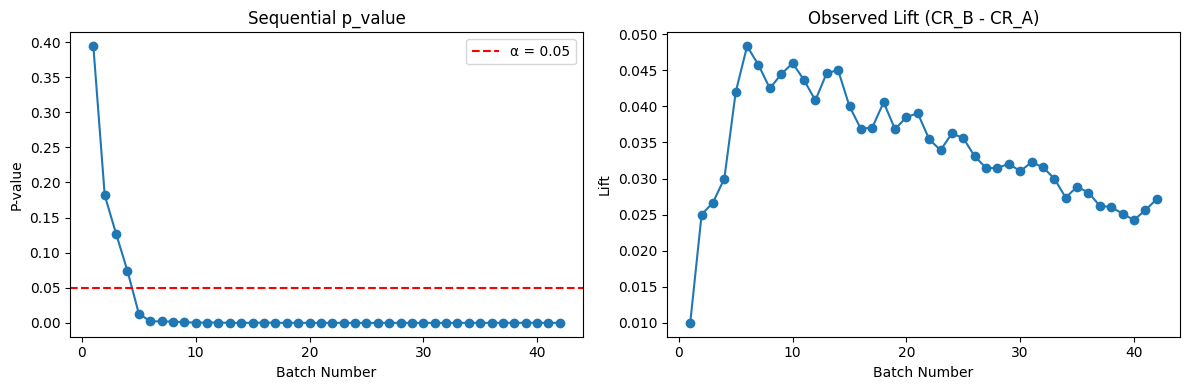

In [ ]:
for batch in range (1,n_batches+1):
    # Simulate one batch of visitors
    new_A=np.random.binomial(batch_size,true_p_A)
    new_B=np.random.binomial(batch_size,true_p_B)

    # Update totals
    n_visits_A +=batch_size
    n_visits_B +=batch_size
    n_succ_A   +=new_A
    n_succ_B   +=new_B

    # Compute current conversion rates
    cr_A = n_succ_A / n_visits_A
    cr_B = n_succ_B / n_visits_B
    lift = cr_B - cr_A

    # Two-Proportion z-test (one sided: B>A)
    count = np.array([n_succ_B, n_succ_A])
    nobs = np.array([n_visits_B, n_visits_A])
    z_stat , p_val=proportions_ztest(count,nobs,alternative='larger')

    # Record for plotting
    batches.append(batch)
    p_values.append(p_val)
    lifts.append(lift)

    # Clear previous output and print current stats
    clear_output(wait=True)
    print(f"Batch {batch}/{n_batches}")
    print(f"Variant A: {n_visits_A} visits, {n_succ_A} buys --> CR = {cr_A:.3%}")
    print(f"Variant B: {n_visits_B} visits, {n_succ_B} buys --> CR = {cr_B:.3%}")
    print(f"Observed lift: {lift:.3f}")
    print(f"Z-Stat = {z_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("--> Significant lift detected (p<0.05).")
    else:
        print("--> No Significant lift yet.")

    # Plot p-value and lift over batches
    fig,axes=plt.subplots(1,2,figsize=(12,4))
    axes[0].plot(batches,p_values,'-o')
    axes[0].axhline(0.05,color='red',linestyle='--',label='α = 0.05')
    axes[0].set_title('Sequential p_value')
    axes[0].set_xlabel('Batch Number')
    axes[0].set_ylabel('P-value')
    axes[0].legend()

    axes[1].plot(batches,lifts,'-o')
    axes[1].set_title('Observed Lift (CR_B - CR_A)')
    axes[1].set_xlabel('Batch Number')
    axes[1].set_ylabel('Lift')

    plt.tight_layout()
    plt.show()

    # Pause briefly to simulate real time
    time.sleep(0.9)

- After 60 batches (6,000 visitors per variant), Variant B showed a higher conversion rate (12.38%) compared to Variant A (9.38%), with an observed lift of **3.0%**.
- The **Z-statistic was 5.28** with a **p-value of 0.0000**, indicating a statistically significant lift (p < 0.05).
- The **left plot** shows that the p-value dropped below 0.05 around batch 6 and remained consistently low, confirming early significance.
- The **right plot** shows that the observed lift stabilized between 2.5% and 4.5%, supporting the conclusion that Variant B performs better.
- Overall, the simulation effectively demonstrates how statistical significance and lift evolve over time with accumulating data.